 # МЕТОДЫ ПРОГРАММИРОВАНИЯ. Лабораторная №4

1. Модифицировать (предложить собственные) два метода генерации псевдослучайных чисел.
2. Получить не менее 10 выборок каждым методом (диапазон чисел в каждой выборке не менее 10000) объемом не менее 50 элементов каждая.
3. Для каждой выборки посчитать среднее, отклонение и коэффициент вариации. Сделать вывод об однородности выборки.
4. Каждую выборку проверить на равномерность распределения и случайность, используя критерий Хи-квадрат.
5. Засечь время генерации чисел от тысячи до миллиона элементов обоими предложенными методами и любым стандартным методом используемого языка программирования. Построить графики сравнения скоростей в зависимости от объема выборки.

In [143]:
seed1 = 23748
def random1(min_val, max_val):
    global seed1
    seed1 = seed1 * 328942 + 1728
    return min_val + seed1  % (max_val - min_val)

In [198]:
# почти  math.random 
seed21 = 27
seed22 = 53
def random2(min_val, max_val): 
    global seed21
    global seed22
    seed21 = 3489 * (seed21 & 0xffff) + (seed21 >> 16)
    seed22 = 23921 * (seed22 & 0xffff) + (seed22 >> 16);
    return min_val + ((seed21 << 16) + (seed22 & 0xffff)) % (max_val - min_val)


In [199]:
ns = [100, 250, 500, 750, 1000, 2500, 5000, 10000]
a1, a2, a3, a4, a5, a6, a7, a8 = [], [], [], [], [], [], [], []
b1, b2, b3, b4, b5, b6, b7, b8 = [], [], [], [], [], [], [], []
list1 = [a1, a2, a3, a4, a5, a6, a7, a8]
list2 = [b1, b2, b3, b4, b5, b6, b7, b8]
for i in range(len(ns)):
    for j in range(ns[i]):
        list1[i].append(random1(0,50000))
        list2[i].append(random2(0,50000))  

In [200]:
# считаем среднее: 
list1sr = []
list2sr = []
for i in range(len(ns)):
    sr1 = 0
    sr2 = 0
    for j in range(ns[i]):
        sr1 += list1[i][j]
        sr2 += list2[i][j]
    sr1 /= ns[i]
    sr2 /= ns[i]
    list1sr.append(sr1)
    list2sr.append(sr2)

In [201]:
# считаем отклонение = sum[(x-sr)**2]/n: 
list1s = []
list2s = []
for i in range(len(ns)):
    s1 = 0
    s2 = 0
    for j in range(ns[i]):
        s1 += (list1[i][j] - list1sr[i])**2
        s2 += (list2[i][j] - list2sr[i])**2
    s1 = (s1/ns[i])**(0.5)
    s2 = (s2/ns[i])**(0.5)
    list1s.append(s1)
    list2s.append(s2)

In [202]:
# считаем коэффициент вариации = стандартное отклонение/среднее: 
list1cv = []
list2cv = []
for i in range(len(ns)):
    cv1 = list1s[i]/list1sr[i] * 100
    cv2 = list2s[i]/list2sr[i] * 100
    list1cv.append(cv1)
    list2cv.append(cv2)

In [68]:
import pandas as pd # для красивого вывода рассчетов

In [203]:
# для первого генератора
columns1 = [1,2,3,4,5,6,7,8]
data1 = [ns, list1sr, list1s, list1cv]
index1 = ['размер выборки', 'среднее', 'отклонение', 'коэффициент вариации']
df1 = pd.DataFrame(data1, index1, columns1)
df1

,1,2,3,4,5,6,7,8
размер выборки,100.000000,250.000000,500.000000,750.000000,1000.000000,2500.000000,5000.000000,10000.000000
среднее,25432.000000,25096.256000,25452.000000,24463.914667,25132.000000,24992.000000,24992.000000,24992.000000
отклонение,14446.137200,13704.732186,14466.266968,14377.542025,14624.283914,14433.760425,14433.760425,14433.760425
коэффициент вариации,56.802993,54.608672,56.837447,58.770406,58.189893,57.753523,57.753523,57.753523


In [204]:
# для второго генератора
columns2 = [1,2,3,4,5,6,7,8]
data2 = [ ns, list2sr, list2s, list2cv]
index2 = ['размер выборки', 'среднее', 'отклонение', 'коэффициент вариации']
df2 = pd.DataFrame(data2, index2, columns2,)
df2

,1,2,3,4,5,6,7,8
размер выборки,100.000000,250.000000,500.000000,750.000000,1000.000000,2500.000000,5000.000000,10000.000000
среднее,23677.280000,23287.988000,24651.462000,24937.157333,24681.713000,25440.752800,24962.290400,25009.466300
отклонение,14370.088499,14802.576497,14421.309769,14396.296215,14357.994361,14490.328137,14423.599186,14472.106169
коэффициент вариации,60.691467,63.563140,58.500830,57.730302,58.172601,56.957152,57.781554,57.866513


среднее = (a+b)/2  </br>
отклонение = sqrt((b-a)**2/12)


# Проверка по критерию Хи-квадрат:

In [205]:
import math

In [220]:
def hi(l):
    hi_t = []
    r_t = []
    for i in l:
        lst = sorted(i) 
        interval = [] 
        n = len(i) 
        summ = 0
        r = 1 + math.floor(math.log(n, 2))
        r_t.append(r - 1)
        n_i = [0] * r
        p_i = []
        for d in range(0, r + 1):
            interval.append(d * 5000 / r)
        for c in lst:
            for d in range(1, r + 1):
                if c < interval[d]:
                    n_i[d - 1] +=  1
                    break
        for d in range(0, r):
            p_i.append(((interval[d + 1] + 1) / 10000) - ((interval[d] + 1) / 10000))
        for d in range (r):
            summ += (((n_i[d] / n) - p_i[d]) ** 2) / p_i[d]
        hi_t.append(summ * n)
    return(hi_t, r_t)


In [221]:
res1, r1 = hi(list1)
res2, r2 = hi(list2)

In [222]:
print(res1)

[39.67999999999999, 90.52, 167.79200000000003, 239.85333333333332, 307.21999999999997, 800.0352, 1600.0480000000002, 3200.256000000001]


In [223]:
print(res2)

[31.21999999999999, 70.08800000000001, 146.27200000000002, 238.30666666666664, 328.36, 815.2095999999999, 1635.1995999999997, 3214.7963999999997]


# Сравнение времени генерации выборок:

In [208]:
from datetime import datetime
import time
import numpy as np

In [209]:
import random

In [210]:
new_ns = [1000, 10000, 100000, 500000, 1000000] 
times1 = []
times2 = []
times3 = [] # для библиотечного генератора

for i in new_ns:
    start_time1 = datetime.now()
    for j in range(i):
        random1(0,5000)
    end_time1 = datetime.now() - start_time1
    times1.append(end_time1)
    
    start_time2 = datetime.now()
    for j in range(i):
        random2(0,5000)
    end_time2 = datetime.now() - start_time2
    times2.append(end_time2)
    
    start_time3 = datetime.now()
    for j in range(i):
        random.randint(0,5000)
    end_time3 = datetime.now() - start_time3
    times3.append(end_time3)

In [211]:
import matplotlib.pyplot as plt # для построения графика

In [212]:
print(times1)
print(times2)
print(times3)

[datetime.timedelta(microseconds=865207), datetime.timedelta(seconds=9, microseconds=54750), datetime.timedelta(seconds=132, microseconds=465769), datetime.timedelta(seconds=1792, microseconds=341009), datetime.timedelta(seconds=8875, microseconds=149098)]
[datetime.timedelta(microseconds=652), datetime.timedelta(microseconds=6274), datetime.timedelta(microseconds=63781), datetime.timedelta(microseconds=318749), datetime.timedelta(microseconds=554901)]
[datetime.timedelta(microseconds=736), datetime.timedelta(microseconds=7759), datetime.timedelta(microseconds=78956), datetime.timedelta(microseconds=393304), datetime.timedelta(microseconds=703144)]


In [213]:
import datetime

# преобразуем микросекунды в float
for i in range(len(new_ns)):
    times1[i] = times1[i].total_seconds() #* 1000000
    times2[i] = times2[i].total_seconds() #* 1000000
    times3[i] = times3[i].total_seconds() #* 1000000     

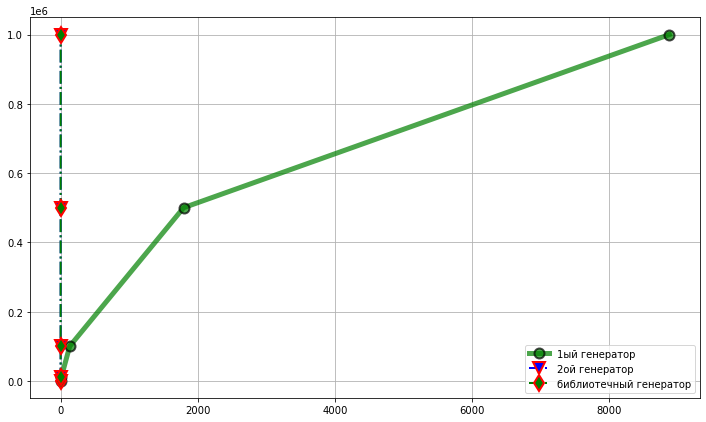

In [215]:
# x = [1, 5, 10, 15, 20]
y = [1000, 10000, 100000, 500000, 1000000] 
plt.figure(figsize=(12, 7))
plt.plot(times1, y, 'o-g', alpha=0.7, label="1ый генератор", lw=5, mec='black', mew=2, ms=10)
plt.plot(times2, y, 'v-.b', label="2ой генератор", mec='r', lw=2, mew=2, ms=12)
plt.plot(times3, y, 'd-.g', label="библиотечный генератор", mec='r', lw=2, mew=2, ms=12)
plt.legend()
plt.grid(True)

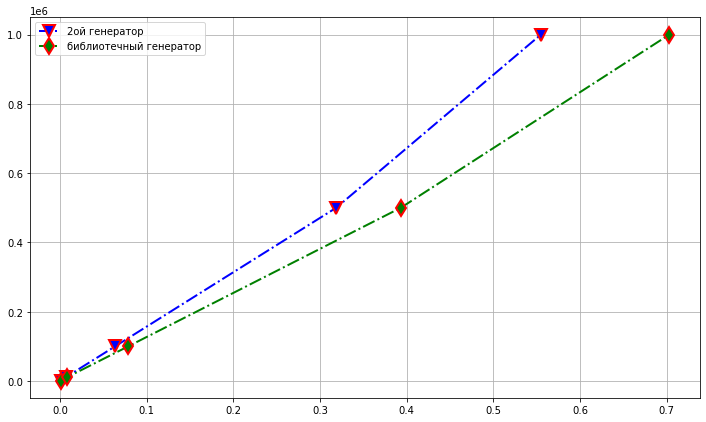

In [216]:

y = [1000, 10000, 100000, 500000, 1000000] 
plt.figure(figsize=(12, 7))
# plt.plot(times1, y, 'o-g', alpha=0.7, label="1ый генератор", lw=5, mec='black', mew=2, ms=10)
plt.plot(times2, y, 'v-.b', label="2ой генератор", mec='r', lw=2, mew=2, ms=12)
plt.plot(times3, y, 'd-.g', label="библиотечный генератор", mec='r', lw=2, mew=2, ms=12)
plt.legend()
plt.grid(True)